# DICE on ABA

In [13]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb

In [2]:
# Loading the comprehensive overlap dataframe of brain regions and Jacobian
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

thresh_df.head()

Last index included to reach an overlap of 0.51 with Jacobian is 15.


,full_ant_index,structure,acronym,ish_id,ant_id,in_200_atlas,region_overlap_ratio,jac_overlap_ratio,DICE_neg_jcb_anat
0,1201,"""internal capsule""","""int""",566.0,6,True,0.810606,0.071716,0.131773
1,573,"""Caudoputamen""","""CP""",83.0,672,True,0.088754,0.097855,0.093083
2,610,"""Globus pallidus, external segment""","""GPe""",127.0,1022,True,0.643617,0.040550,0.076293
3,703,"""Reticular nucleus of the thalamus""","""RT""",315.0,262,True,0.586592,0.035188,0.066393
4,1188,"""arbor vitae""","""arb""",656.0,728,True,0.117841,0.035858,0.054985


In [3]:
'''
Brain regions to add:
1. "Primary visual area, layer 5", "VISp5" : 778
2. "Anterior cingulate area, dorsal part, layer 5", "ACAd5" : 1015
3. "Dentate gyrus, granule cell layer", "DG-sg" : 632
4. "Locus ceruleus", "LC" : 147
5. "Substantia nigra, compact part", "SNc" : 374
'''
extra_acronyms_list = ["VISp5", "ACAd5", "DG-sg", "LC", "SNc"]
extra_antid_list = [778, 1015, 632, 147, 374]

In [4]:
# Sortment of Brain regions into groups
worse_ids_list = [672, 463, 507]
converge_ids_list = [6, 1022, 1009, 867, 976, 1031, 147, 374, 778, 632]
plateau_ids_list = [262, 728, 484682528, 718, 81, 1091, 1015]

In [39]:
find_orientation(1009)

0

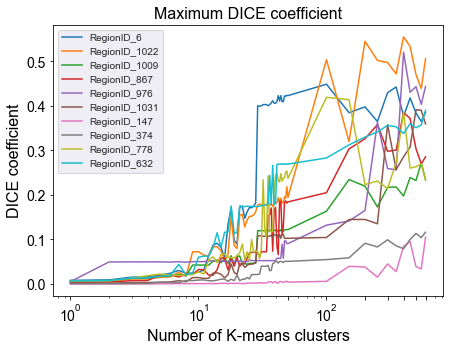

In [34]:
cluster_path = '/data/bioprotean/ABA/SFT/Kmeans_rc/'
plot_regions_DICE(converge_ids_list, cluster_path)

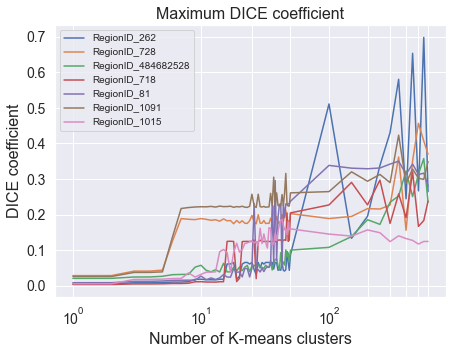

In [26]:
cluster_path = '/data/bioprotean/ABA/KernelPCA/poly3/Kmeans_rc/'
plot_regions_DICE(plateau_ids_list, cluster_path)

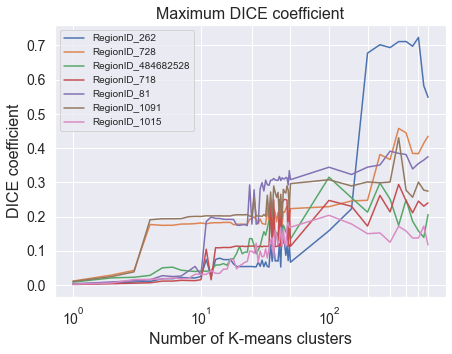

In [27]:
cluster_path = '/data/bioprotean/ABA/PCA/80_variance/Kmeans_labels/'
plot_regions_DICE(plateau_ids_list, cluster_path)

# Scatter plot of DICE scores and Sagittal/Axial length ratios

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


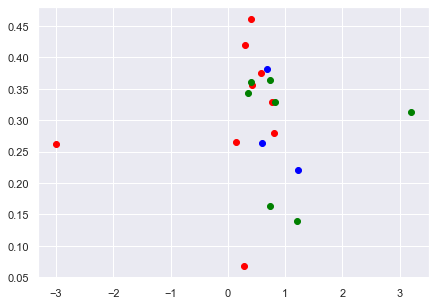

In [7]:
cluster_path = '/data/bioprotean/ABA/SFT/clusters/100features_594_clusters.npy'
labels = np.load(cluster_path)
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

# Setting the figure size
plt.rcParams["figure.figsize"] = (7,5)

# Initiating the plots
fig, ax = plt.subplots()
worse_lists = DICE_length_function(worse_ids_list, labels_rc)
ax.scatter(worse_lists[0], worse_lists[1], c = 'blue')

converge_lists = DICE_length_function(converge_ids_list, labels_rc)
ax.scatter(converge_lists[0], converge_lists[1], c = 'red')

plateau_lists = DICE_length_function(plateau_ids_list, labels_rc)
ax.scatter(plateau_lists[0], plateau_lists[1], c = 'green')

# Setting the grid style
sns.set(style = "darkgrid")

#     # Manual set of grid values and labels
#     plt.xscale('log')
#     x_values = [1,10,25,50,100,200,300,400,500,594]
#     ax.set_xticks(x_values)
#     ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Sagittal/Axial Length ratio", fontsize = 16)
# plt.ylabel("Maximum DICE coefficient", fontsize = 16)
# plt.title("DICE/Length scatter plot", fontsize = 16)
# plt.legend(['RegionID_'+str(ID) for ID in region_ids_list], fontsize = 10)

# Visualizing
plt.show()

# region_ids_list = [672, 463, 507, 6, 1022, 1009, 867, 976, 1031, 147, 374, 778, 632, 262, 728, 484682528, 718, 81, 1091, 1015]
# scatter_DICE_orientation(region_ids_list, labels_rc)

In [ ]:
cluster_path = '/data/bioprotean/ABA/SFT/clusters/100features_594_clusters.npy'
labels = np.load(cluster_path)
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

# Setting the figure size
plt.rcParams["figure.figsize"] = (7,5)

# Initiating the plots
fig, ax = plt.subplots()
worse_lists = DICE_length_function(worse_ids_list, labels_rc)
ax.scatter(worse_lists[0], worse_lists[1], c = 'blue')

converge_lists = DICE_length_function(converge_ids_list, labels_rc)
ax.scatter(converge_lists[0], converge_lists[1], c = 'red')

plateau_lists = DICE_length_function(plateau_ids_list, labels_rc)
ax.scatter(plateau_lists[0], plateau_lists[1], c = 'green')

# Setting the grid style
sns.set(style = "darkgrid")

#     # Manual set of grid values and labels
#     plt.xscale('log')
#     x_values = [1,10,25,50,100,200,300,400,500,594]
#     ax.set_xticks(x_values)
#     ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Sagittal/Axial Length ratio", fontsize = 16)
# plt.ylabel("Maximum DICE coefficient", fontsize = 16)
# plt.title("DICE/Length scatter plot", fontsize = 16)
# plt.legend(['RegionID_'+str(ID) for ID in region_ids_list], fontsize = 10)

# Visualizing
plt.show()

# region_ids_list = [672, 463, 507, 6, 1022, 1009, 867, 976, 1031, 147, 374, 778, 632, 262, 728, 484682528, 718, 81, 1091, 1015]
# scatter_DICE_orientation(region_ids_list, labels_rc)

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


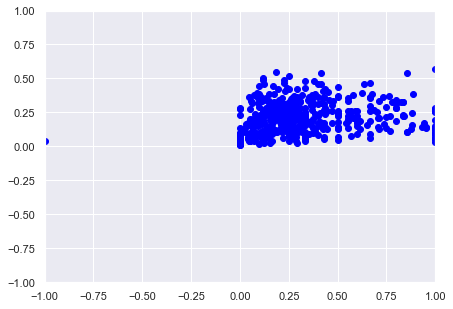

In [11]:
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)
ant_list = list(np.unique(ant_vec))

cluster_path = '/data/bioprotean/ABA/SFT/clusters/100features_594_clusters.npy'
labels = np.load(cluster_path)
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

# Setting the figure size
plt.rcParams["figure.figsize"] = (7,5)

# Initiating the plots
fig, ax = plt.subplots()

total_list = DICE_length_function(ant_list, labels_rc)
ax.scatter(total_list[0], total_list[1], c = 'blue')

# Setting the grid style
sns.set(style = "darkgrid")

# Setting x and y limits
plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Visualizing
plt.show()

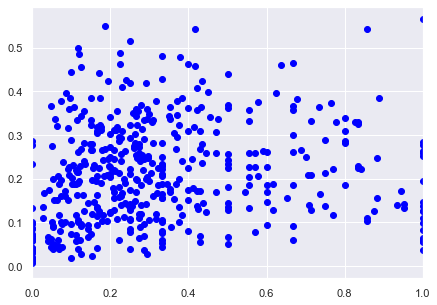

In [12]:
# Initiating the plots
fig, ax = plt.subplots()

ax.scatter(total_list[0], total_list[1], c = 'blue')

# Setting the grid style
sns.set(style = "darkgrid")

# Setting x and y limits
plt.xlim([0, 1])

# Visualizing
plt.show()

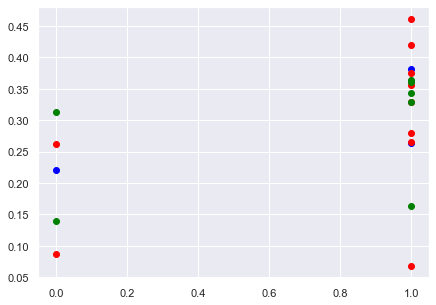

In [14]:
cluster_path = '/data/bioprotean/ABA/SFT/clusters/100features_594_clusters.npy'
labels = np.load(cluster_path)
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

# Setting the figure size
plt.rcParams["figure.figsize"] = (7,5)

# Initiating the plots
fig, ax = plt.subplots()
worse_lists = DICE_orientation_function(worse_ids_list, labels_rc)
ax.scatter(worse_lists[0], worse_lists[1], c = 'blue')

converge_lists = DICE_orientation_function(converge_ids_list, labels_rc)
ax.scatter(converge_lists[0], converge_lists[1], c = 'red')

plateau_lists = DICE_orientation_function(plateau_ids_list, labels_rc)
ax.scatter(plateau_lists[0], plateau_lists[1], c = 'green')

# Setting the grid style
sns.set(style = "darkgrid")

#     # Manual set of grid values and labels
#     plt.xscale('log')
#     x_values = [1,10,25,50,100,200,300,400,500,594]
#     ax.set_xticks(x_values)
#     ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Sagittal/Axial Length ratio", fontsize = 16)
# plt.ylabel("Maximum DICE coefficient", fontsize = 16)
# plt.title("DICE/Length scatter plot", fontsize = 16)
# plt.legend(['RegionID_'+str(ID) for ID in region_ids_list], fontsize = 10)

# Visualizing
plt.show()

# region_ids_list = [672, 463, 507, 6, 1022, 1009, 867, 976, 1031, 147, 374, 778, 632, 262, 728, 484682528, 718, 81, 1091, 1015]
# scatter_DICE_orientation(region_ids_list, labels_rc)